In [9]:
if (!require("RRF")) install.packages("RRF"); library("RRF")
if (!require("data.table")) install.packages("data.table"); library("data.table")
if (!require("dplyr")) install.packages("dplyr"); library("dplyr")
set.seed(123)

In [10]:
# read in training data
train <- fread("data/antenatal_hie_train.csv", check.names=T)
test <- fread("data/antenatal_hie_test.csv", check.names=T)

# drop missing values
train <- train[complete.cases(train)]
test <- test[complete.cases(test)]

# downsample for testing
train <- sample_n(train, 1000)

# set outcome as factor
train$X_hie <- as.factor(train$X_hie)
test$X_hie <- as.factor(test$X_hie)

In [11]:
fit <- rrfcv(train[,-c("X_hie", "X_id")], train$X_hie)

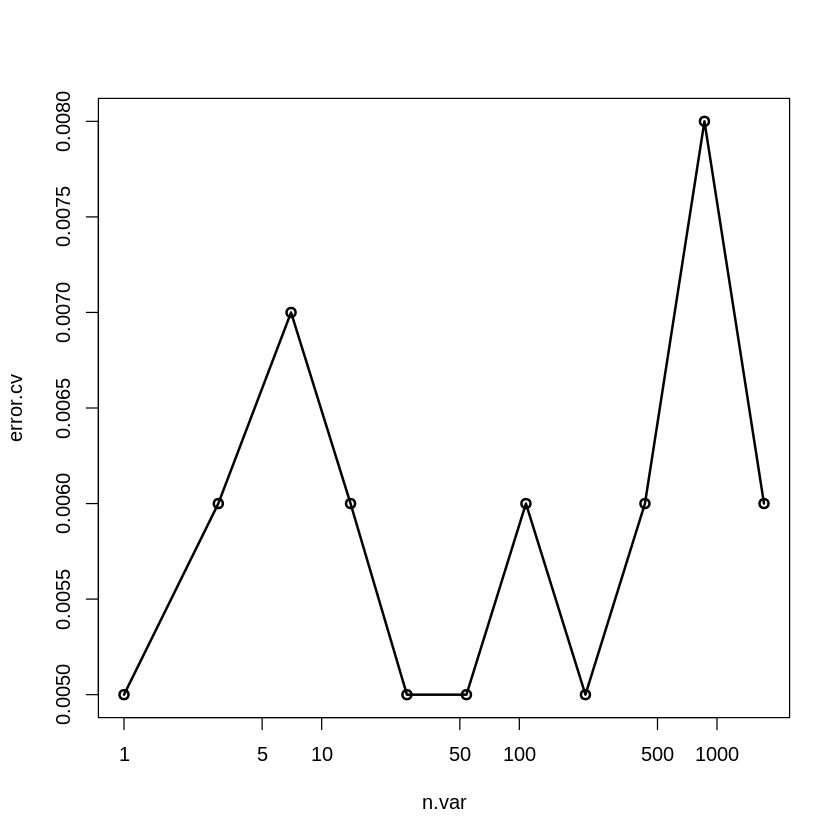

In [13]:
# plots
with(fit, plot(n.var, error.cv, log="x", type="o", lwd=2))

In [ ]:
sessionInfo()